# EDA-美國計程車小費
(Exploratory Data Analysis, EDA)

大多數的資料為原始資料，可能存在許多問題，比如樣本分配不均、無完整數據(空值)、離群值、非常態分布...，我們必須找出，並進行處理。

可以透過Exploratory Data Analysis(EDA，資料探索)尋找資料中的問題並進行清理。資料探索分為統計圖表，資料清理。

統計圖表:
![](https://github.com/Yi-Huei/bin/blob/master/images/EDA.png?raw=true)  

本篇採用Seaborn內建資料庫，[資料來源與說明連結](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)  
根據本資料庫之計程車小費與其因子，進行資料探索與分析。計程車小費為連續型變數，其他因子有連續型與類別行變數。

## 1. 載入資料

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 載入資料
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


欄位tip為y，其他欄位為X

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


由表可知本資料集，無空值

資料別為float64、category、int64

## 2.描述性統計
Seaborn describe()可直接針對"連續變數"與"類別變數"進行描述性統計，一般預設為float、int等數字型別

若要使用其他型別進行描述性統計，調整參數include=

In [4]:
df.describe().transpose()  #transpose()為行列互換

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
df.describe(include='category').transpose()

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


## 3.連續變數探索
1. 探索y  
2. 探索X  
3. 探索X與y之關聯度

可以使用直方圖、常態分佈圖、盒形圖、小提琴圖進行探索

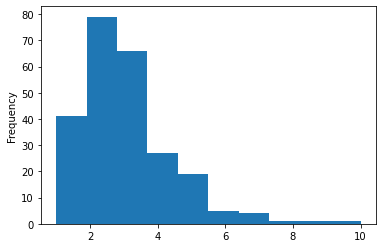

In [6]:
df['tip'].plot.hist(bins = 10)

圖形為右移，具有偏大離散直。  
解決方法: 取log -> 變成常態分配，log可以取多次

## 4.矯正右偏(skew)
當資料未呈常態分配時，可以取log

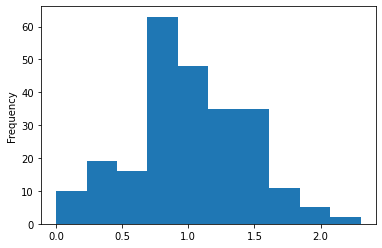

In [7]:
#取log
np.log(df['tip']).plot.hist( bins = 10)

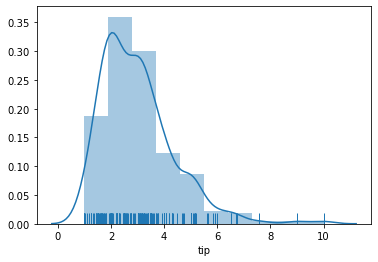

In [8]:
#常態分佈曲線
'''
參數rug:資料所在位置(深藍短柱)
    kde:密度圖(藍色曲線)
    hist:直方圖
'''
sns.distplot(df ['tip'], bins = 10, rug=True,  kde=True, hist=True)

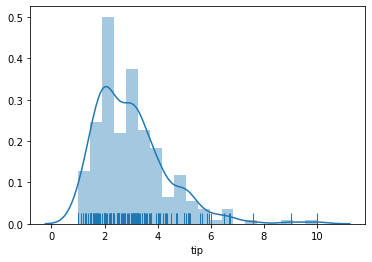

In [9]:
sns.distplot(df ['tip'], bins = 20, rug=True,  kde=True, hist=True)

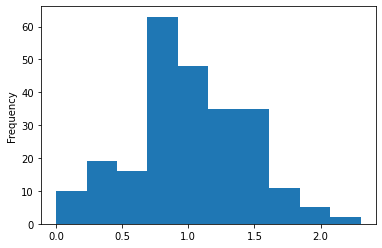

In [10]:
tips = np.log(df['tip'])
tips.plot.hist( bins = 10)

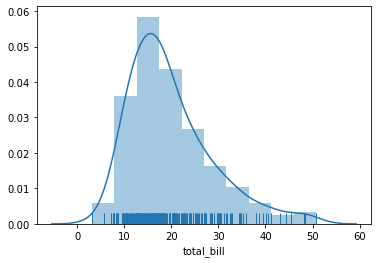

In [11]:
sns.distplot(df['total_bill'], bins = 10, rug=True,  kde=True, hist=True)

## 5.類別變數探索
類別變數探索

In [12]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

2類別應該一致，較好

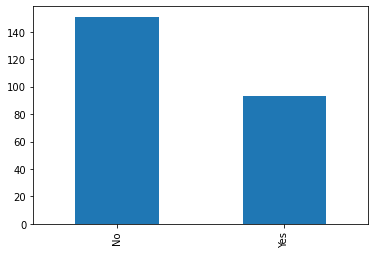

In [13]:
df['smoker'].value_counts().plot(kind='bar')

使用Seaborn繪圖，自動上色，並標上x軸與y軸

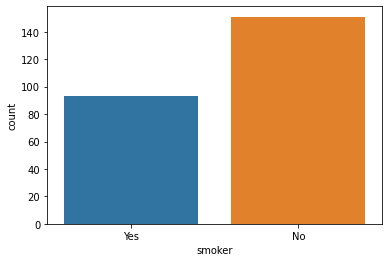

In [14]:
sns.countplot(df['smoker'])

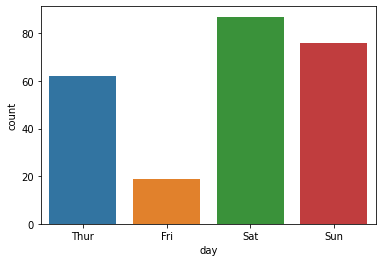

In [15]:
sns.countplot(df['day'])

由圖可知，星期五(Fri)人次最少

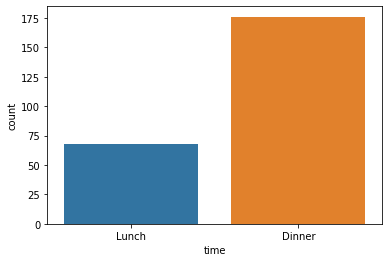

In [16]:
sns.countplot(df['time'])

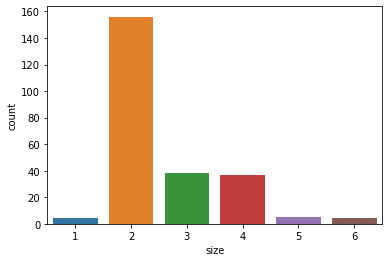

In [17]:
#同行人數
sns.countplot(df['size'])

## 6.X與Y的關聯度、X之間的依存度
0 -> 關聯度最低
1 -> 關聯度最高

In [18]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


類別變數是無法進行關聯度分析，故將類別變數轉成連續變數

In [19]:
#將文字資料轉成數字，使用函數為map
df['sex_n'] = df['sex'].map({'Female':0, 'Male':1}).astype(int)
df['smoker_n'] = df['smoker'].map({'No':0, 'Yes':1}).astype(int)
df['day_n'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3}).astype(int)
df['time_n'] = df['time'].map({'Lunch':0, 'Dinner':1}).astype(int)
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_n,smoker_n,day_n,time_n
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,3,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,3,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,3,1


In [20]:
# 查詢欄位有哪些資料
df['day_n'].unique()

array([3, 2, 0, 1])

In [21]:
# 再進行一次關聯度分析
df.corr()

,total_bill,tip,size,sex_n,smoker_n,day_n,time_n
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,0.173693,0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,0.135499,0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.165350,0.103411
sex_n,0.144877,0.088862,0.086195,1.000000,0.002816,0.230791,0.205231
smoker_n,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.032653,0.054921
day_n,0.173693,0.135499,0.165350,0.230791,-0.032653,1.000000,0.874366
time_n,0.183118,0.121629,0.103411,0.205231,0.054921,0.874366,1.000000


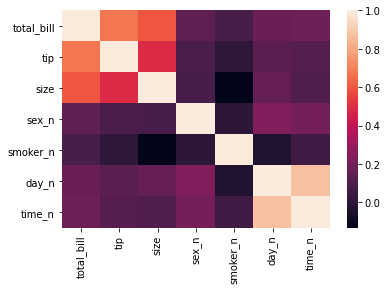

In [22]:
#亦可使用熱圖查看關聯性: 對角線不看(自比)，顏色"越淺"或"越深"之關聯度越高
sns.heatmap(df.corr())

## 7. Seaborn的pairplot
[pairplot參數教學](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

重要參數介紹
- kind:{‘scatter’(散布), ‘kde’(機率), ‘hist’(直方), ‘reg’(回歸)}
- diag_kind{‘auto’, ‘hist’, ‘kde’, None} 對角線圖

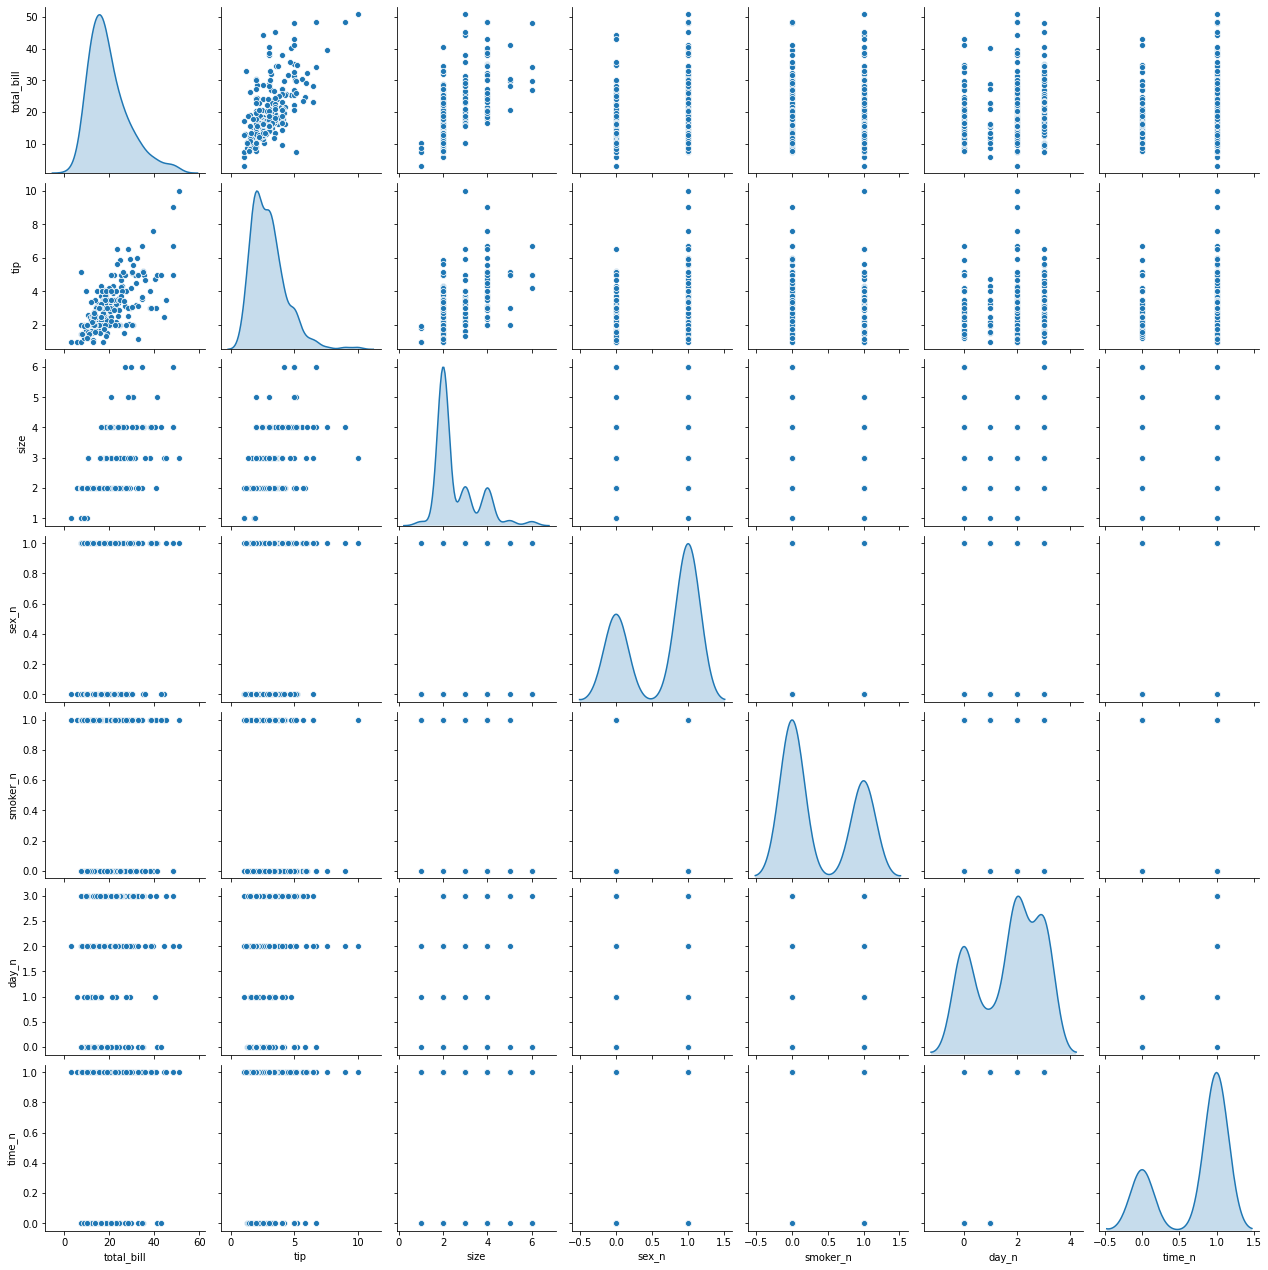

In [23]:
# 使用散佈圖觀察各欄位的相關度
sns.pairplot(df,diag_kind='kde')

## 8. relplot

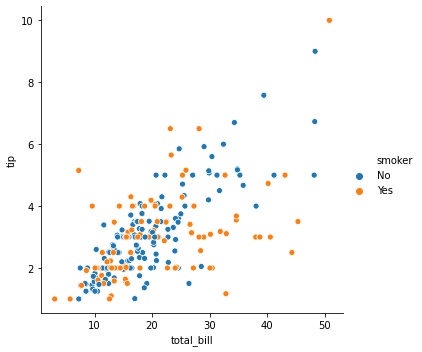

In [24]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df) #hue= 添加類別

## 9. 盒形圖boxplot

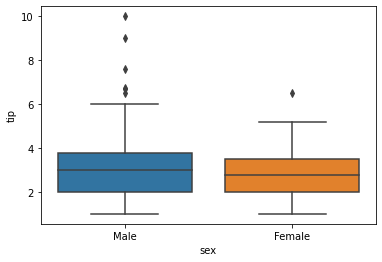

In [25]:
sns.boxplot('sex', 'tip', data=df)

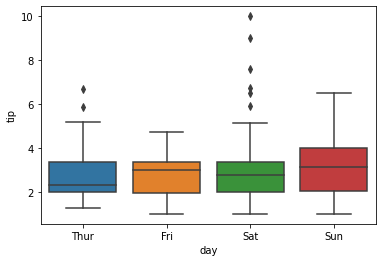

In [26]:
sns.boxplot('day', 'tip', data=df)

In [27]:
df['holiday'] = df['day_n'].map(lambda x: 0 if x==0 else 1)

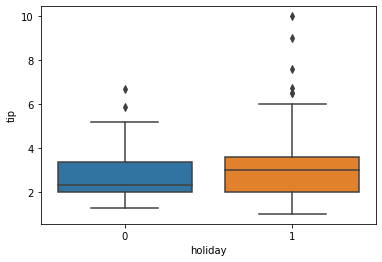

In [28]:
sns.boxplot('holiday', 'tip', data=df)

## 10. 小提琴圖

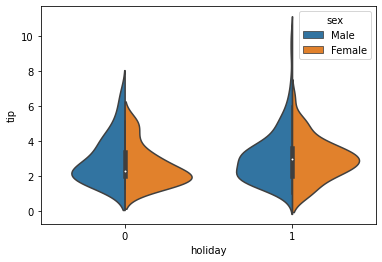

In [29]:
sns.violinplot('holiday', 'tip', hue='sex', data=df, split=True) #hue=類別

## 11. FacetGrid
針對每一個欄位進行分析  
[說明網站](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

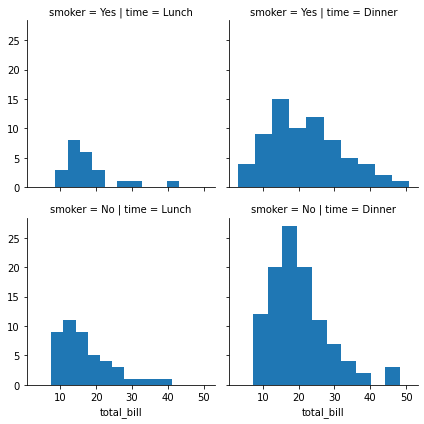

In [30]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

## 12. 複合圖
使用seaborn jointplot套件  
[jointplot參數教學](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

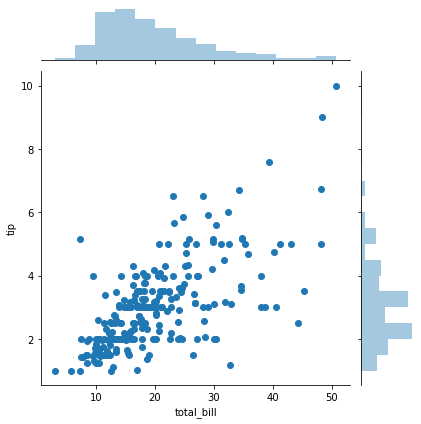

In [31]:
# Scatter plots(散佈圖+直方圖)
sns.jointplot(x="total_bill", y="tip", data=df)

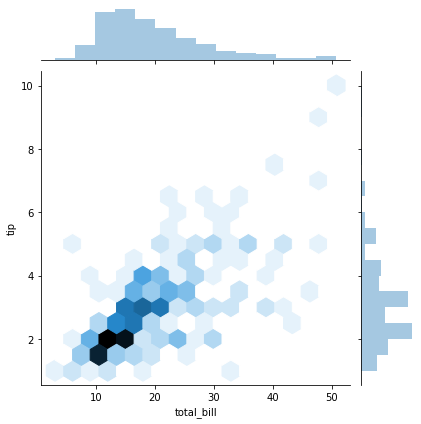

In [32]:
# Hexbin plots
sns.jointplot(x="total_bill", y="tip", data=df, kind="hex")

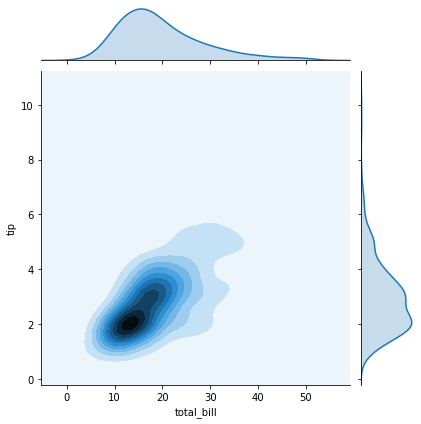

In [33]:
# Kernel density estimation(KDE)
sns.jointplot(x="total_bill", y="tip", data=df, kind="kde")

## 13. catplot
查看數據分布情形  
[說明網站](https://seaborn.pydata.org/generated/seaborn.catplot.html)

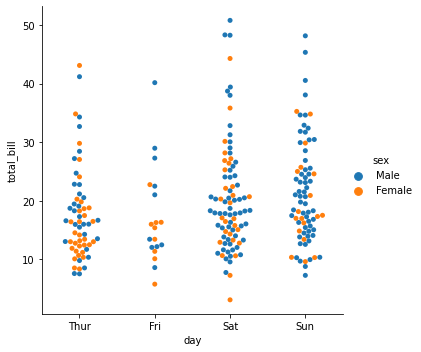

In [34]:
# swarm
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=df)

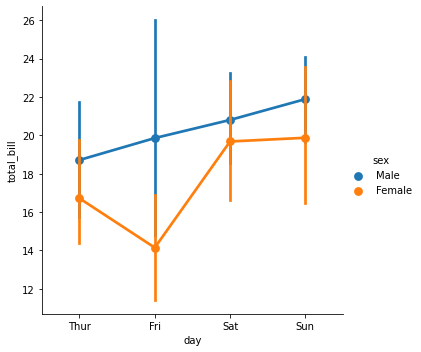

In [35]:
# line chart with confendence
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=df)

圖中  
點:中位數  
直線:信賴區間